In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 분석 순서
=====================================================
# 1. 파일로부터 데이터 읽어들이기 (적재)
# 2. 데이터 가공 (데이터 합치기, 값 변경하기,  컬럼 추가하기 등)
# 3. 필요한 데이터만 추출
# 4. 데이터 분석 (groupby, pivot_table)
# 5. 데이터 시각화
=====================================================

# 1. 파일로부터 데이터 읽어들이기 (적재)

## 1.1. csv 파일을 읽을 때에는 read_csv()

### data/ex5.csv 파일 - 구분자는 공백 하나(' ')
<img src="img/분석요약/csv파일예제.jpg" alt="csv파일예제" style="width: 400px;"/>

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 1.2. 엑셀 파일을 읽을 때에는 read_excel()
### sheetname = None. 모든 시트의 데이터를 읽어서 사전 형태로 저장됨. 
### key = 시트의 이름, value = 각 시트에 있는 데이터들을 저장한 데이터프레임 

### data/ex6.xlsx 파일 
<img src="img/분석요약/엑셀파일예제.jpg" alt="csv파일예제" style="width: 500px;"/>

In [5]:
시트1

,a,b
0,1,2
1,5,6
2,9,10


In [6]:
시트2

,c,d,message
0,3,4,hello
1,7,8,world
2,11,12,foo


# 2. 데이터 가공
## 2.1. 데이터 합치기

### 2.1.1. merge
<img src="img/분석요약/merge예제.jpg" alt="csv파일예제" style="width: 600px;"/>

In [7]:
#df1과 df2 생성 (시험  범위 X)
df1 = DataFrame([[1,3],[2,4]], 
                           columns = list('AB'))
df2 = DataFrame([[1,'aa'],[2,'bb']], 
                           columns = list('AC'))

,A,B,C
0,1,3,aa
1,2,4,bb


### 2.2.2. concat(axis = 0)
<img src="img/분석요약/concat0예제.jpg" alt="csv파일예제" style="width: 600px;"/>

In [10]:
#df1과 df2 생성 (시험  범위 X)
df1 = DataFrame([[1,'aa'],[2,'bb']], 
                           columns = list('AB'))
df2 = DataFrame([[3,'cc'],[4,'dd']], 
                           columns = list('AB'))

,A,B
0,1,aa
1,2,bb
2,3,cc
3,4,dd


### 2.2.3. concat(axis = 1)
<img src="img/분석요약/concat1예제.jpg" alt="csv파일예제" style="width: 800px;"/>

In [12]:
# df1, df2 생성 (시험 범위 X)
df1 = DataFrame([[1,10],[2,20]], 
                           columns = list('AB'), index = ['aa','bb'])
df2 = DataFrame([[3,'xx'],[4,'yy']], 
                           columns = list('CD'), index = ['aa','bb'])

,A,B,C,D
aa,1,10,3,xx
bb,2,20,4,yy


## 2.2. 기존 컬럼을 이용하여, 새로운 컬럼 추가하기 (+ 산술연산)

### 2.2.1 산술연산 
<img src="img/분석요약/산술연산.jpg" alt="csv파일예제" style="width: 600px;"/>

In [61]:
#sr1, sr2 생성 (시험 범위 X)
sr1 = Series([1,2,3], index = list('abc'))
sr2 =  Series([4,5,6], index = list('abd'))

In [64]:
sr1+sr2

a    5.0
b    7.0
c    NaN
d    NaN
dtype: float64

In [65]:
sr1.add(sr2, fill_value = 0)

a    5.0
b    7.0
c    3.0
d    6.0
dtype: float64

In [3]:
# df 생성 (시험 범위 X)
df = DataFrame([[1,10],[2,20], [3,30], [4, 40]], 
                           columns = list('AB'))
df

,A,B
0,1,10
1,2,20
2,3,30
3,4,40


In [4]:
# A 컬럼과 B 컬럼의 값을 더해서 새로운 C라는 컬럼 만들기


,A,B,C
0,1,10,11
1,2,20,22
2,3,30,33
3,4,40,44


# 3. 필요한 데이터 추출

## 목표: 영화 평점 데이터 중, 2000년도에 10세 이상의 사람들이 리뷰한 평점 정보만 추출

In [5]:
# 영화 평점 데이터 적재 (시험 범위 X)
data = pd.read_csv('data/movie_ratings.csv', encoding = 'utf-8')
data.평점날짜 = data.평점날짜.apply(pd.to_datetime)

In [6]:
data.head()

,영화제목,장르,평점날짜,평점,성별,연령
0,One Flew Over the Cuckoo's Nest (1975),Drama,2001-01-01,5,F,1
1,One Flew Over the Cuckoo's Nest (1975),Drama,2001-01-01,5,M,56
2,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31,4,M,25
3,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31,4,M,25
4,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-30,5,M,50


In [7]:
#1. '평점날짜' 컬럼을 인덱스 라벨로 설정


In [8]:
data.head()

,영화제목,장르,평점,성별,연령
평점날짜,,,,,
2001-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,5,F,1
2001-01-01,One Flew Over the Cuckoo's Nest (1975),Drama,5,M,56
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,M,50


In [10]:
# 2. 2000년 데이터만 선택


In [12]:
data.head()

,영화제목,장르,평점,성별,연령
평점날짜,,,,,
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,M,50
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,4,F,18
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,F,25


In [15]:
# 3. 연령이 10세 이상인 사람들이 리뷰한 데이터만 선택


In [16]:
data.head()

,영화제목,장르,평점,성별,연령
평점날짜,,,,,
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,M,50
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,4,F,18
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,F,25


# 4. 데이터 분석 (groupby, pivot_table)

## 분석 목표 1. 영화별 평균 평점과 리뷰의 갯수를 구하여(groupby, agg 사용), 인기 영화 찾기
### 인기영화란 평균 평점이 4.4이상이고 리뷰의 수가 2000개 이상인 영화로 정의함

In [17]:
# 1) 영화별 평균 평점과 리뷰의 갯수 구하기
# groupby와 agg 함수 사용하기


In [19]:
평점분석.head()

,mean,count
영화제목,,
"$1,000,000 Duck (1971)",3.172414,29
'Night Mother (1986),3.475410,61
'Til There Was You (1997),2.714286,42
"'burbs, The (1989)",2.901460,274
...And Justice for All (1979),3.727778,180


In [20]:
# 2) 인기 영화 찾기 리뷰 수가 2000개 이상이고, 평점이 4.4점 이상인 영화만 출력
인기영화 = 

In [21]:
인기영화

,mean,count
영화제목,,
"Godfather, The (1972)",4.516034,2027
Raiders of the Lost Ark (1981),4.488302,2308
Schindler's List (1993),4.511475,2135
"Shawshank Redemption, The (1994)",4.558321,2049
"Sixth Sense, The (1999)",4.418456,2189
Star Wars: Episode IV - A New Hope (1977),4.457559,2745


## 분석 목표 2. 연령대별로 영화들의 평점평균 구하기 (pivot_table() 사용)

In [22]:
data.head()

,영화제목,장르,평점,성별,연령
평점날짜,,,,,
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,M,50
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,4,F,18
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,F,25


In [24]:
# 연령대 컬럼을 만들기 위한 '나이대' 함수 선언 (시험 범위 X)
def 나이대(나이):
    if 나이 < 20:
        return '10대'
    elif 나이 < 30:
        return '20대'
    elif 나이 < 40:
        return '30대'
    elif 나이 < 50:
        return '40대'
    elif 나이 < 60:
        return '50대'
    else:
        return '60대 이상'

In [25]:
# 1) 나이대 함수를 이용하여 연령대 컴럼을 추가


In [26]:
data.head()

,영화제목,장르,평점,성별,연령,연령대
평점날짜,,,,,,
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25,20대
2000-12-31,One Flew Over the Cuckoo's Nest (1975),Drama,4,M,25,20대
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,M,50,50대
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,4,F,18,10대
2000-12-30,One Flew Over the Cuckoo's Nest (1975),Drama,5,F,25,20대


In [27]:
# 2)연령대별로 평점 평균 구하기 (pivot_table() 이용하기)
연령별평점 = 

In [29]:
연령별평점.head()

연령대,10대,20대,30대,40대,50대
영화제목,,,,,
"$1,000,000 Duck (1971)",3.400000,2.875000,3.333333,2.000000,3.333333
'Night Mother (1986),4.666667,3.458333,2.941176,3.833333,3.818182
'Til There Was You (1997),2.400000,2.695652,3.333333,2.333333,2.600000
"'burbs, The (1989)",3.256410,2.676190,2.807692,2.545455,3.071429
...And Justice for All (1979),3.250000,3.730769,3.666667,4.105263,3.690476


# 5. 데이터 시각화

##  목표 : 연령별 영화평점 정보를 그래프로 그리기
### 영화 목록이 너무 많으므로, 분석 1에서 구한 인기영화에 대해서만 그래프로 그리기

In [30]:
# 1) 분석 2에서 구한 연령별 평점 정보들 중 인기영화만 선택하기
연령별평점 = 

In [31]:
연령별평점

연령대,10대,20대,30대,40대,50대
영화제목,,,,,
"Godfather, The (1972)",4.486567,4.557769,4.538636,4.355670,4.514754
Raiders of the Lost Ark (1981),4.388506,4.578664,4.477551,4.432990,4.394636
Schindler's List (1993),4.465394,4.483750,4.507246,4.592233,4.601351
"Shawshank Redemption, The (1994)",4.682028,4.591961,4.496000,4.494382,4.365145
"Sixth Sense, The (1999)",4.314583,4.449889,4.460648,4.447853,4.412037
Star Wars: Episode IV - A New Hope (1977),4.422642,4.572770,4.352349,4.394850,4.373832


In [32]:
# 연령별평점 dataframe의 행과 열을 맞바꾸기 (Transpose)
연령별평점 = 연령별평점.T
연령별평점

영화제목,"Godfather, The (1972)",Raiders of the Lost Ark (1981),Schindler's List (1993),"Shawshank Redemption, The (1994)","Sixth Sense, The (1999)",Star Wars: Episode IV - A New Hope (1977)
연령대,,,,,,
10대,4.486567,4.388506,4.465394,4.682028,4.314583,4.422642
20대,4.557769,4.578664,4.483750,4.591961,4.449889,4.572770
30대,4.538636,4.477551,4.507246,4.496000,4.460648,4.352349
40대,4.355670,4.432990,4.592233,4.494382,4.447853,4.394850
50대,4.514754,4.394636,4.601351,4.365145,4.412037,4.373832


In [33]:
# matplotlib 사용 시, 그래프에서 한글이 깨지는 경우에 해결 방법


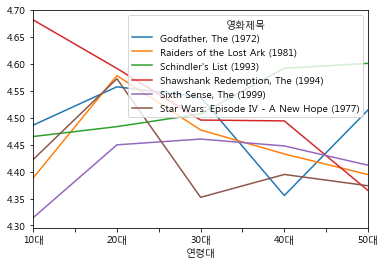